<a href="https://colab.research.google.com/github/studam/Covid-19-fake-news/blob/main/covid_19news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import itertools



In [43]:
#Read the data
from google.colab import files
uploaded = files.upload()

Data_1=pd.read_csv('fakeNews.csv')
#Get shape and head
Data_1.shape
Data_1.head()

Saving COVID19-FNIR (1).zip to COVID19-FNIR (1).zip


,Date Posted,Link,Text,Region,Country,Explanation,Origin,Origin_URL,Fact_checked_by,Poynter_Label,Label
0,02/07/2020,https://www.poynter.org/?ifcn_misinformation=t...,Tencent revealed the real number of deaths.\t\t,Europe,France,The screenshot is questionable.,Twitter,https://www.liberation.fr/checknews/2020/02/07...,CheckNews,Misleading,0
1,02/07/2020,https://www.poynter.org/?ifcn_misinformation=t...,Taking chlorine dioxide helps fight coronavir...,Europe,Germany,Chlorine dioxide does guard against the coron...,Website,https://correctiv.org/faktencheck/medizin-und-...,Correctiv,FALSE,0
2,02/07/2020,https://www.poynter.org/?ifcn_misinformation=t...,This video shows workmen uncovering a bat-inf...,India,India,A video shows bats nesting in the roof; howev...,Facebook,https://factcheck.afp.com/video-shows-workmen-...,AFP,MISLEADING,0
3,02/07/2020,https://www.poynter.org/?ifcn_misinformation=t...,The Asterix comic books and The Simpsons pred...,India,India,Coronavirus has been around since the 1960s. ...,Twitter,https://www.boomlive.in/health/did-the-simpson...,BOOM FactCheck,Misleading,0
4,02/07/2020,https://www.poynter.org/?ifcn_misinformation=c...,Chinese President Xi Jinping visited a mosque...,India,India,Chinese President Xi Jinping's visit to the m...,Facebook,http://newsmobile.in/articles/2020/02/07/chine...,NewsMobile,FALSE,0


In [44]:
#Read the data
from google.colab import files
uploaded = files.upload()

Data_2=pd.read_csv('trueNews.csv')
#Get shape and head
Data_2.shape
Data_2.head()

Saving COVID19-FNIR (1).zip to COVID19-FNIR (1) (1).zip


,Date Posted,Link,Text,Region,Username,Publisher,Label
0,2/11/20,https://twitter.com/the_hindu/status/122725962...,Just in: Novel coronavirus named 'Covid-19': U...,India,the_hindu,The Hindu,1
1,2/12/20,https://twitter.com/ndtv/status/12274908434742...,WHO officially names #coronavirus as Covid-19....,India,ndtv,NDTV,1
2,2/12/20,https://twitter.com/the_hindu/status/122744471...,"The #UN #health agency announced that ""COVID-1...",India,the_hindu,The Hindu,1
3,2/14/20,https://twitter.com/IndiaToday/status/12282764...,The Indian Embassy in Tokyo has said that one ...,India,indiatoday,IndiaToday,1
4,2/15/20,https://twitter.com/the_hindu/status/122854247...,Ground Zero | How Kerala used its experience i...,India,the_hindu,The Hindu,1


In [45]:
Fake_news = Data_1
Fake_news.head()

,Date Posted,Link,Text,Region,Country,Explanation,Origin,Origin_URL,Fact_checked_by,Poynter_Label,Label
0,02/07/2020,https://www.poynter.org/?ifcn_misinformation=t...,Tencent revealed the real number of deaths.\t\t,Europe,France,The screenshot is questionable.,Twitter,https://www.liberation.fr/checknews/2020/02/07...,CheckNews,Misleading,0
1,02/07/2020,https://www.poynter.org/?ifcn_misinformation=t...,Taking chlorine dioxide helps fight coronavir...,Europe,Germany,Chlorine dioxide does guard against the coron...,Website,https://correctiv.org/faktencheck/medizin-und-...,Correctiv,FALSE,0
2,02/07/2020,https://www.poynter.org/?ifcn_misinformation=t...,This video shows workmen uncovering a bat-inf...,India,India,A video shows bats nesting in the roof; howev...,Facebook,https://factcheck.afp.com/video-shows-workmen-...,AFP,MISLEADING,0
3,02/07/2020,https://www.poynter.org/?ifcn_misinformation=t...,The Asterix comic books and The Simpsons pred...,India,India,Coronavirus has been around since the 1960s. ...,Twitter,https://www.boomlive.in/health/did-the-simpson...,BOOM FactCheck,Misleading,0
4,02/07/2020,https://www.poynter.org/?ifcn_misinformation=c...,Chinese President Xi Jinping visited a mosque...,India,India,Chinese President Xi Jinping's visit to the m...,Facebook,http://newsmobile.in/articles/2020/02/07/chine...,NewsMobile,FALSE,0


In [46]:
Fake_news.rename(columns ={"Binary Label":"Label"}, inplace=True)

In [47]:
Fake_news.head()

,Date Posted,Link,Text,Region,Country,Explanation,Origin,Origin_URL,Fact_checked_by,Poynter_Label,Label
0,02/07/2020,https://www.poynter.org/?ifcn_misinformation=t...,Tencent revealed the real number of deaths.\t\t,Europe,France,The screenshot is questionable.,Twitter,https://www.liberation.fr/checknews/2020/02/07...,CheckNews,Misleading,0
1,02/07/2020,https://www.poynter.org/?ifcn_misinformation=t...,Taking chlorine dioxide helps fight coronavir...,Europe,Germany,Chlorine dioxide does guard against the coron...,Website,https://correctiv.org/faktencheck/medizin-und-...,Correctiv,FALSE,0
2,02/07/2020,https://www.poynter.org/?ifcn_misinformation=t...,This video shows workmen uncovering a bat-inf...,India,India,A video shows bats nesting in the roof; howev...,Facebook,https://factcheck.afp.com/video-shows-workmen-...,AFP,MISLEADING,0
3,02/07/2020,https://www.poynter.org/?ifcn_misinformation=t...,The Asterix comic books and The Simpsons pred...,India,India,Coronavirus has been around since the 1960s. ...,Twitter,https://www.boomlive.in/health/did-the-simpson...,BOOM FactCheck,Misleading,0
4,02/07/2020,https://www.poynter.org/?ifcn_misinformation=c...,Chinese President Xi Jinping visited a mosque...,India,India,Chinese President Xi Jinping's visit to the m...,Facebook,http://newsmobile.in/articles/2020/02/07/chine...,NewsMobile,FALSE,0


In [48]:
fake = Fake_news.drop(["Date Posted",'Link','Country','Origin_URL', 'Fact_checked_by','Poynter_Label'], axis=1)

In [49]:
fake.head()

,Text,Region,Explanation,Origin,Label
0,Tencent revealed the real number of deaths.\t\t,Europe,The screenshot is questionable.,Twitter,0
1,Taking chlorine dioxide helps fight coronavir...,Europe,Chlorine dioxide does guard against the coron...,Website,0
2,This video shows workmen uncovering a bat-inf...,India,A video shows bats nesting in the roof; howev...,Facebook,0
3,The Asterix comic books and The Simpsons pred...,India,Coronavirus has been around since the 1960s. ...,Twitter,0
4,Chinese President Xi Jinping visited a mosque...,India,Chinese President Xi Jinping's visit to the m...,Facebook,0


In [50]:
True_news = Data_2
True_news.head()

,Date Posted,Link,Text,Region,Username,Publisher,Label
0,2/11/20,https://twitter.com/the_hindu/status/122725962...,Just in: Novel coronavirus named 'Covid-19': U...,India,the_hindu,The Hindu,1
1,2/12/20,https://twitter.com/ndtv/status/12274908434742...,WHO officially names #coronavirus as Covid-19....,India,ndtv,NDTV,1
2,2/12/20,https://twitter.com/the_hindu/status/122744471...,"The #UN #health agency announced that ""COVID-1...",India,the_hindu,The Hindu,1
3,2/14/20,https://twitter.com/IndiaToday/status/12282764...,The Indian Embassy in Tokyo has said that one ...,India,indiatoday,IndiaToday,1
4,2/15/20,https://twitter.com/the_hindu/status/122854247...,Ground Zero | How Kerala used its experience i...,India,the_hindu,The Hindu,1


In [51]:
true = True_news.drop(["Date Posted",'Link','Username', 'Publisher'], axis=1)

In [52]:
true.head()

,Text,Region,Label
0,Just in: Novel coronavirus named 'Covid-19': U...,India,1
1,WHO officially names #coronavirus as Covid-19....,India,1
2,"The #UN #health agency announced that ""COVID-1...",India,1
3,The Indian Embassy in Tokyo has said that one ...,India,1
4,Ground Zero | How Kerala used its experience i...,India,1


In [53]:
News = fake.append(true, ignore_index=True)

In [54]:
News.head()

,Text,Region,Explanation,Origin,Label
0,Tencent revealed the real number of deaths.\t\t,Europe,The screenshot is questionable.,Twitter,0
1,Taking chlorine dioxide helps fight coronavir...,Europe,Chlorine dioxide does guard against the coron...,Website,0
2,This video shows workmen uncovering a bat-inf...,India,A video shows bats nesting in the roof; howev...,Facebook,0
3,The Asterix comic books and The Simpsons pred...,India,Coronavirus has been around since the 1960s. ...,Twitter,0
4,Chinese President Xi Jinping visited a mosque...,India,Chinese President Xi Jinping's visit to the m...,Facebook,0


In [55]:
x = News.iloc[:,:-1].values
y = News.iloc[:,-1].values

In [56]:
x[0]

array([' Tencent revealed the real number of deaths.\t\t', 'Europe',
       ' The screenshot is questionable.', ' Twitter'], dtype=object)

In [57]:
y[0]

0

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
mat_body = cv.fit_transform(x[:,1]).todense()

In [59]:
mat_body

matrix([[1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        ...,
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 1, 1]])

In [60]:
cv_head = CountVectorizer(max_features=5000)
mat_head = cv_head.fit_transform(x[:,0]).todense()

In [61]:
mat_head

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [62]:
x_mat = np.hstack(( mat_head, mat_body))

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_mat,y, test_size=0.2, random_state=0)

In [64]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train, y_train)
y_pred=dtc.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [65]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[742,   0],
       [  4, 772]])

In [66]:
# Accuracy
(742+770)/(742+770+0+6)

0.9960474308300395

In [77]:
# Add flag to track fake and true
fake['target'] = 'FAKE'
true['target'] = 'TRUE'

In [68]:
fake

,Text,Region,Explanation,Origin,Label,target
0,Tencent revealed the real number of deaths.\t\t,Europe,The screenshot is questionable.,Twitter,0,FAKE
1,Taking chlorine dioxide helps fight coronavir...,Europe,Chlorine dioxide does guard against the coron...,Website,0,FAKE
2,This video shows workmen uncovering a bat-inf...,India,A video shows bats nesting in the roof; howev...,Facebook,0,FAKE
3,The Asterix comic books and The Simpsons pred...,India,Coronavirus has been around since the 1960s. ...,Twitter,0,FAKE
4,Chinese President Xi Jinping visited a mosque...,India,Chinese President Xi Jinping's visit to the m...,Facebook,0,FAKE
...,...,...,...,...,...,...
3790,Bill Gates said that the COVID-19 vaccine wil...,Europe,The new RNA and DNA vaccine candidates are ex...,Social Media and Websites,0,FAKE
3791,COVID-19 vaccine candidates will insert micro...,Europe,The hoax comes from a misinterpretation of a ...,Whatsapp and Facebook,0,FAKE
3792,An image claims that chroma screen panels are...,Europe,The image has been manipulated. The real one ...,Social Media,0,FAKE
3793,"Alexandria Ocasio-Cortez tweeted, ""It's vital...",United States,Alexandria Ocasio-Cortez didn't tweet this.,Viral image,0,FAKE


In [78]:
true

,Text,Region,Label,target
0,Just in: Novel coronavirus named 'Covid-19': U...,India,1,TRUE
1,WHO officially names #coronavirus as Covid-19....,India,1,TRUE
2,"The #UN #health agency announced that ""COVID-1...",India,1,TRUE
3,The Indian Embassy in Tokyo has said that one ...,India,1,TRUE
4,Ground Zero | How Kerala used its experience i...,India,1,TRUE
...,...,...,...,...
3788,Global COVID-19 prevention trial of hydroxychl...,Europe,1,TRUE
3789,Bavaria's free COVID-19 test for all splits Ge...,Europe,1,TRUE
3790,Britain locks down city of Leicester after COV...,Europe,1,TRUE
3791,UK imposes lockdown on city of Leicester to cu...,Europe,1,TRUE


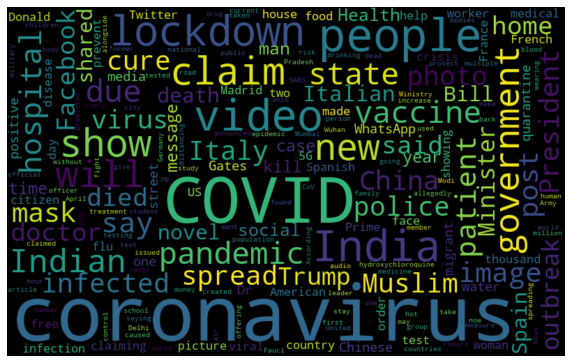

In [69]:
# Word cloud for fake news
from wordcloud import WordCloud

all_words = ' '.join([text for text in fake.Text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
#another style
#wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

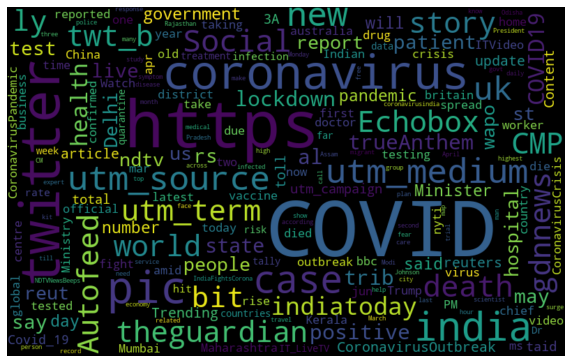

In [70]:
# Word cloud for true news
from wordcloud import WordCloud

all_words = ' '.join([text for text in true.Text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Region
Europe           2771
India            3555
United States    1262
Name: Label, dtype: int64


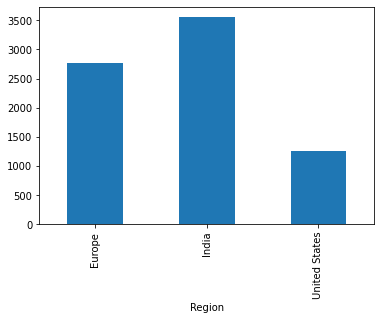

In [83]:
# How many articles in Region?
print(News.groupby(['Region'])['Label'].count())
News.groupby(['Region'])['Label'].count().plot(kind="bar")
plt.show()

target
FAKE    3795
Name: Text, dtype: int64
target
TRUE    3793
Name: Text, dtype: int64


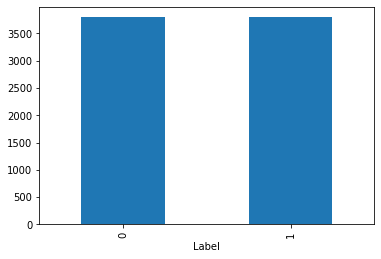

In [87]:
# How many fake and real articles?
print(fake.groupby(['target'])['Text'].count())
print(true.groupby(['target'])['Text'].count())
News.groupby(['Label'])['Text'].count().plot(kind="bar")
plt.show()

In [92]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

In [106]:
#DataFlair - Get the labels
labels = News.Label
Labels.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [109]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(News['Text'], labels, test_size=0.2, random_state=7)

In [110]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [111]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.6%


In [113]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['0','1'])

array([[0, 0],
       [0, 0]])

In [114]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



In [116]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(News['Text'], News.Label, test_size=0.2, random_state=42)

In [117]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.28%


Confusion matrix, without normalization


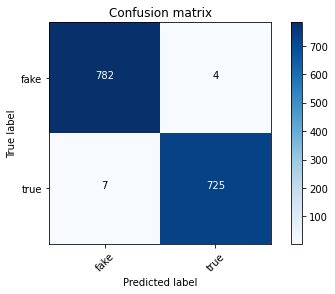

In [118]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['fake', 'true'])

In [119]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.47%


Confusion matrix, without normalization


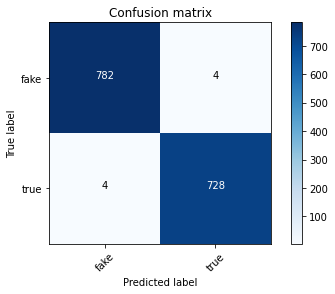

In [120]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['fake', 'true'])

In [121]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.6%


Confusion matrix, without normalization


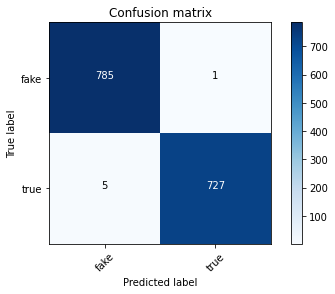

In [122]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['fake', 'true'])